In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train[9]

4

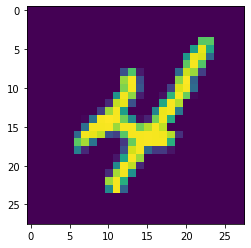

In [6]:
plt.imshow(X_train[9])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [12]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [13]:
Y_train[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [14]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [16]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 108s 58ms/step - loss: 0.2153 - accuracy: 0.9528 - val_loss: 0.0897 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 108s 57ms/step - loss: 0.0679 - accuracy: 0.9786 - val_loss: 0.0790 - val_accuracy: 0.9773
Epoch 3/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0445 - accuracy: 0.9854 - val_loss: 0.0820 - val_accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0955 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 107s 57ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.1108 - val_accuracy: 0.9763


In [17]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.11082842946052551, 0.9763000011444092]


In [18]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 70ms/step
[[1.7056911e-14 1.2478351e-20 2.6386440e-10 7.5450363e-10 3.4965673e-22
  1.0469790e-17 5.1829903e-22 1.0000000e+00 2.0636008e-16 4.2479319e-11]
 [1.3324627e-06 1.3783284e-05 9.9927050e-01 3.8990208e-07 2.7452346e-13
  9.4659261e-15 7.1335747e-04 5.0660100e-15 7.0447459e-07 1.9477538e-14]
 [1.6659433e-08 9.9999666e-01 1.2218270e-06 1.2666421e-10 4.4909595e-07
  3.1856015e-10 1.7610676e-08 9.5645731e-09 1.6523059e-06 1.1564768e-12]
 [1.0000000e+00 2.6301663e-18 4.4515735e-11 3.0719808e-14 1.1011467e-14
  2.8773069e-14 9.2730684e-10 1.4154809e-15 6.2259937e-12 4.6303900e-10]]


In [19]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:6])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [20]:
model.save("model.h5")

In [21]:
model=load_model("model.h5")